# Project Goal 
> - To predict what percentage of a Teams overall budget will be paid to the quarterback

# Project Description
> - Using data aquired from various websites we ran correlation tests to find the most statistically significant features

# Initial Hypothesis
> - Players who extend the season of their team I.E playoffs will have a higher percentage of their teams salary cap
> - Players who have more yards and touchdowns will have a higher percentage of their teams salary cap
> - Players who have more interceptions will have a lower percentage of their teams salary cap
> - Players who have a higher passer rating will have a higher percentage of their teams salary cap

# Imports

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
import wrangle
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from pydataset import data
from sklearn.linear_model import LinearRegression
import random
random.seed(10)

In [2]:
df = pd.read_csv('pivot_final.csv',index_col=[0])

In [3]:
df.head()

,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,full_name,year_signed,percent_of_cap
name,,,,,,,,,,,,,,,,,,
Rex Grossman,WAS,2010,4.0,74.0,133.0,55.6,884.0,6.6,7.0,4.0,81.16,3.0,6.0,2.0,0.0,Rex Grossman,2015,0.7
Rex Grossman,WAS,2011,13.0,265.0,458.0,57.9,3148.0,6.9,16.0,20.0,72.39,20.0,11.0,0.6,1.0,Rex Grossman,2015,0.7
Matt Flynn,GB,2013,7.0,124.0,200.0,62.0,1392.0,7.0,8.0,5.0,85.67,20.0,65.0,3.2,0.0,Matt Flynn,2013,4.7
Matt Flynn,GB,2013,7.0,124.0,200.0,62.0,1392.0,7.0,8.0,5.0,85.67,20.0,65.0,3.2,0.0,Matt Flynn,2013,0.7
Jameis Winston,TB,2015,16.0,312.0,535.0,58.3,4042.0,7.6,22.0,15.0,84.19,54.0,213.0,3.9,6.0,Jameis Winston,2015,4.4


In [4]:
df.columns

Index(['team', 'year', 'games_played', 'comp', 'att', 'comp_pct', 'yds',
       'avg_yds_per_att', 'td', 'int', 'pass_rating', 'rush_att', 'rush_yds',
       'rush_avg', 'rush_td', 'full_name', 'year_signed', 'percent_of_cap'],
      dtype='object')

In [5]:
train, validate, test = wrangle.split_data(df)

columns_list = df.select_dtypes(exclude=['object']).columns.to_list()

        
target = columns_list.pop(len(columns_list) -1 )
corr_test = wrangle.correlation_tests(train, columns_list , target).reset_index().drop(columns = 'index')

# Univariate Analysis

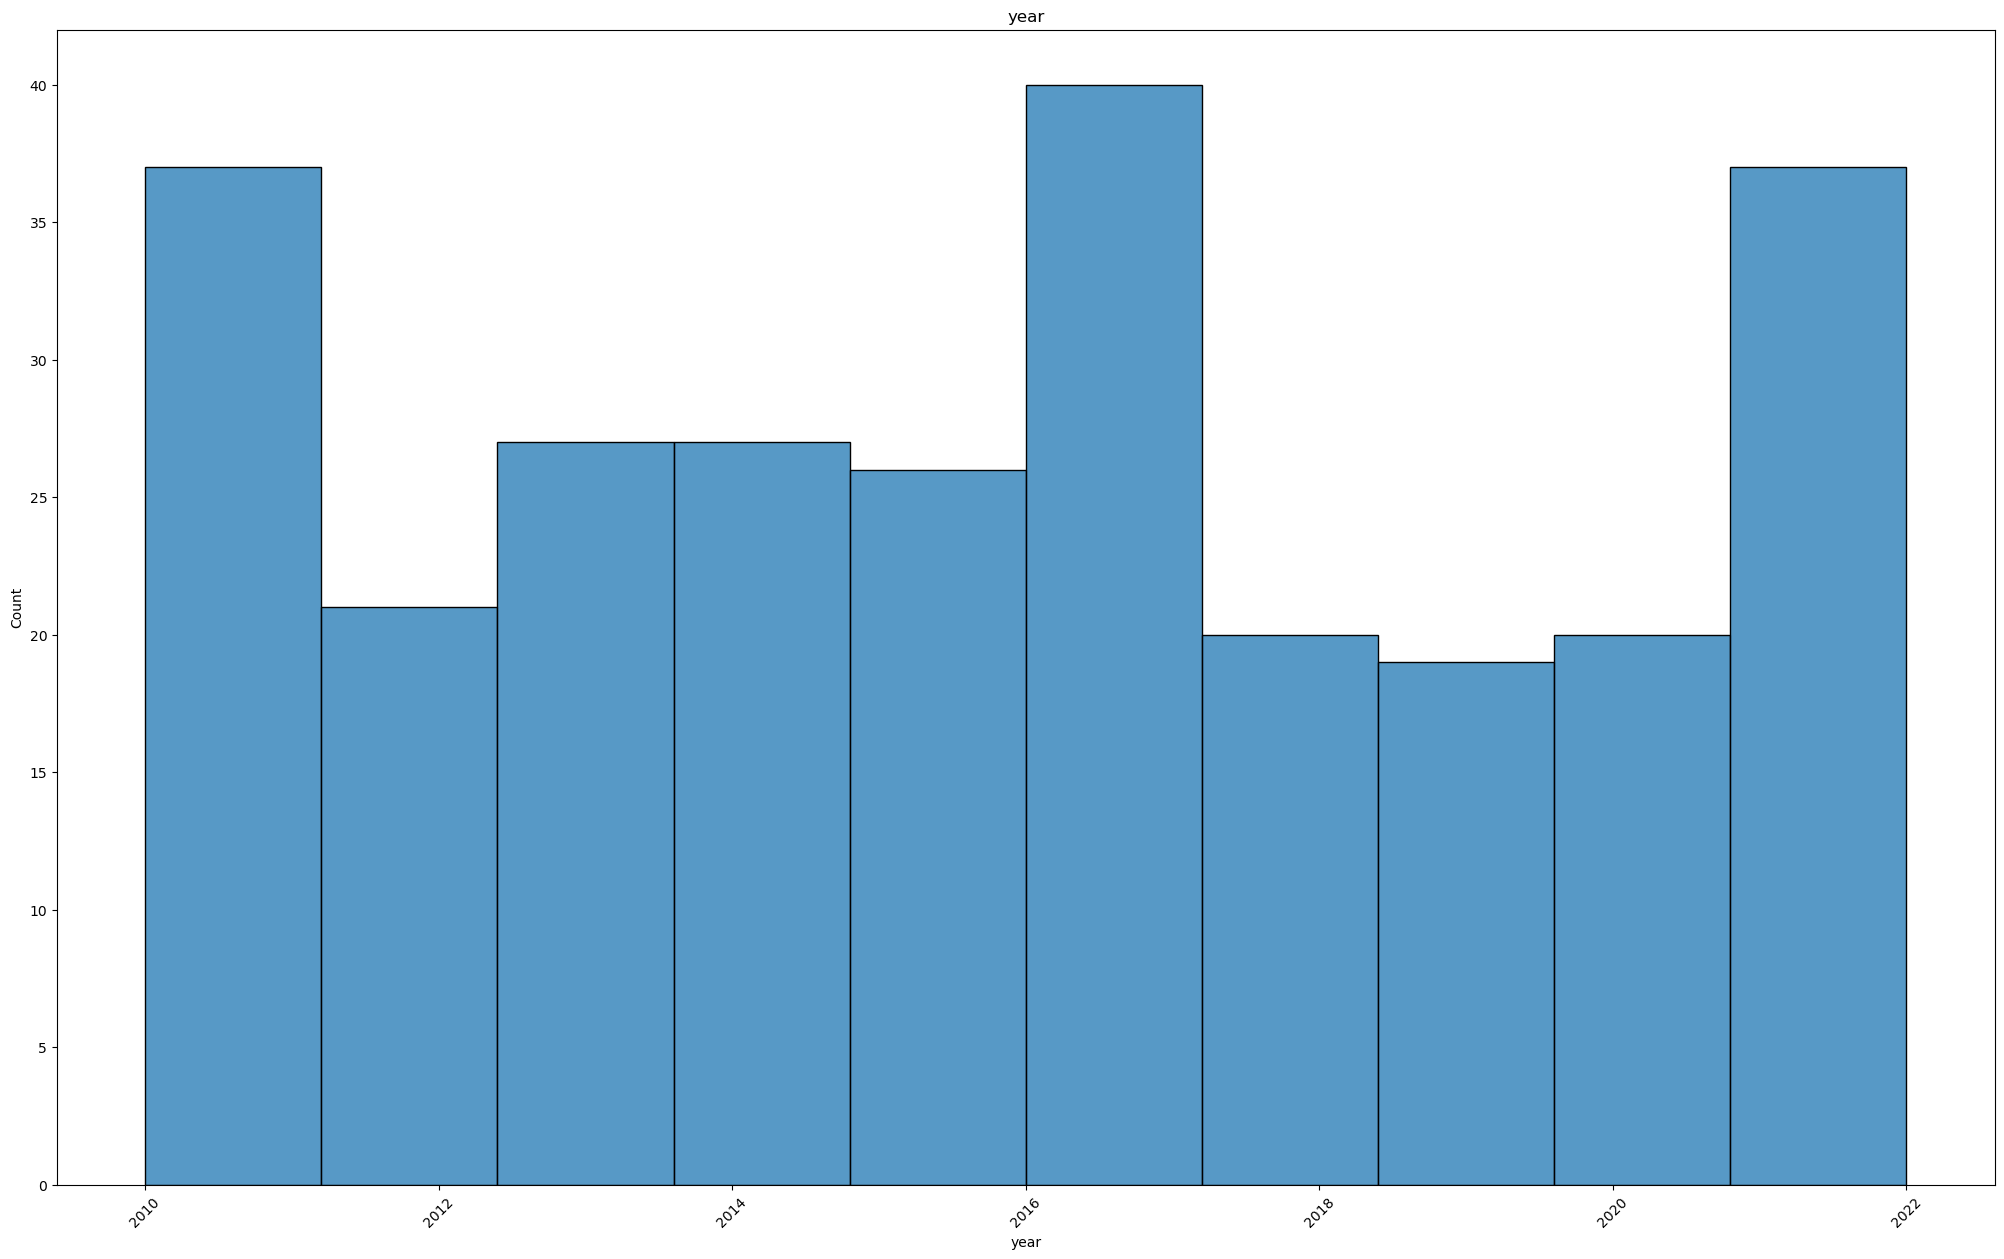

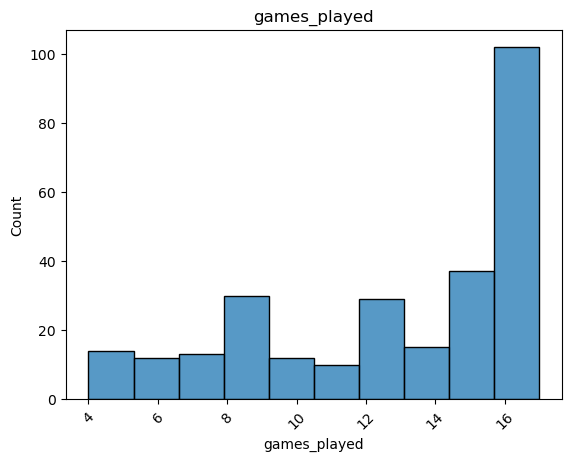

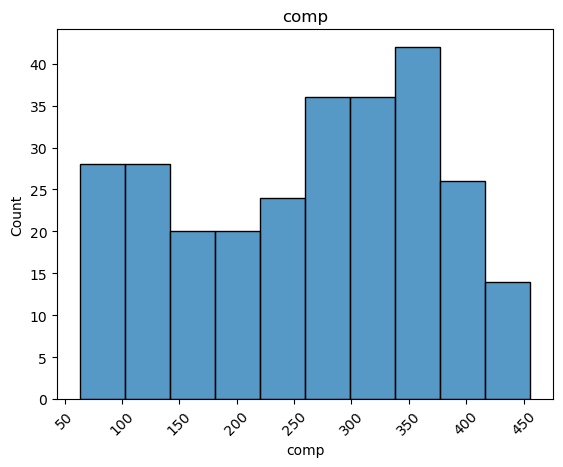

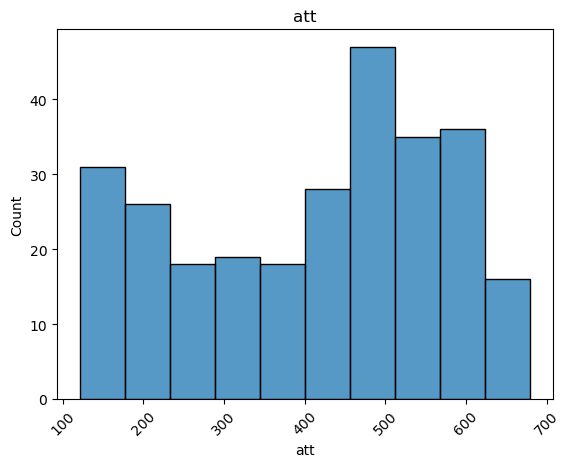

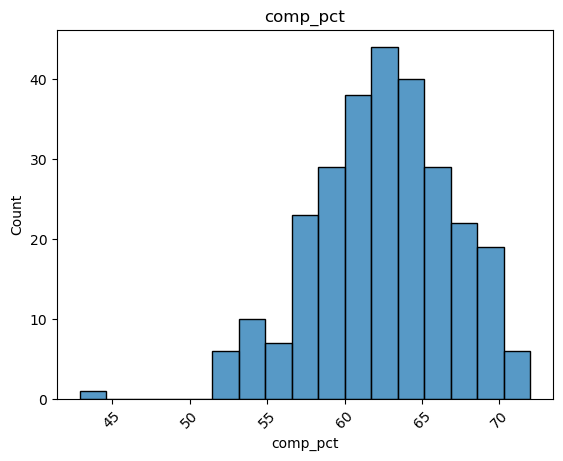

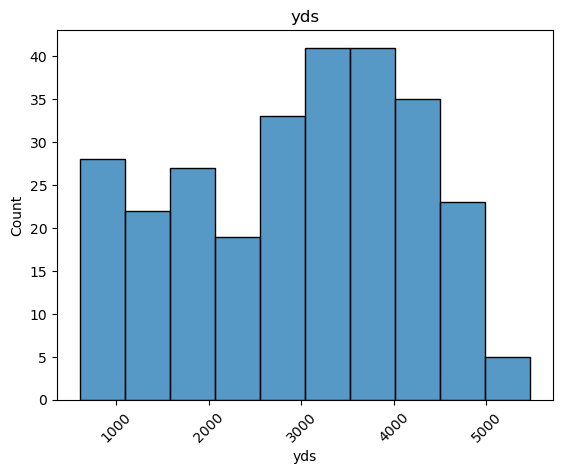

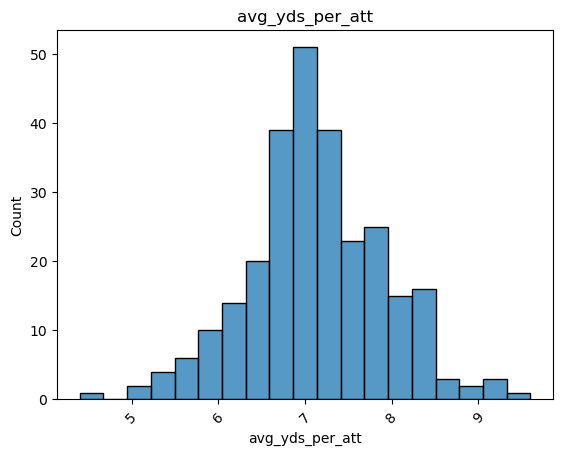

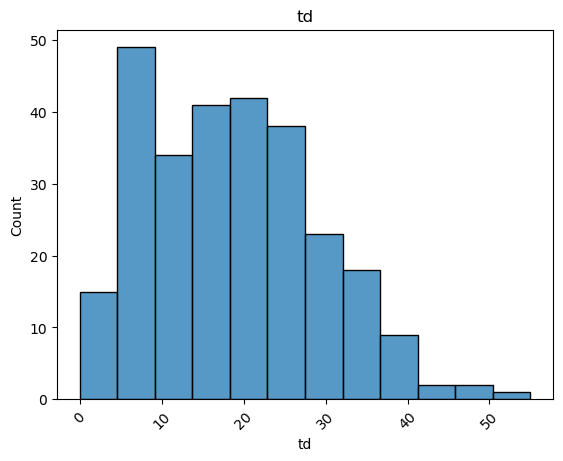

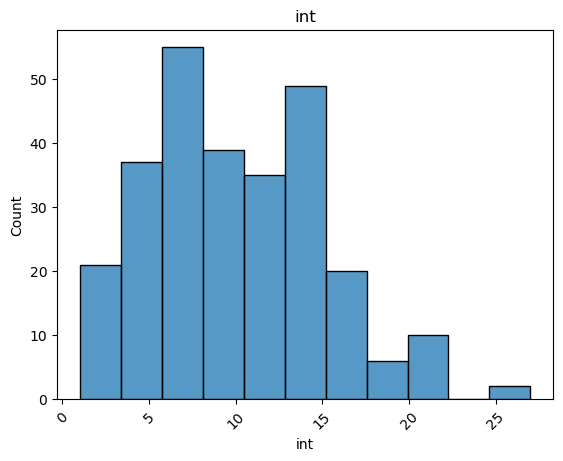

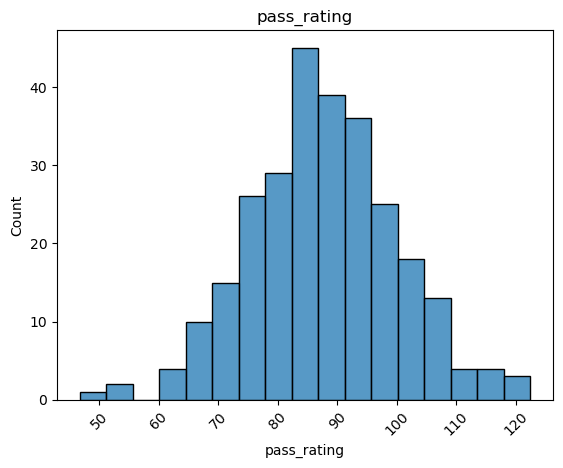

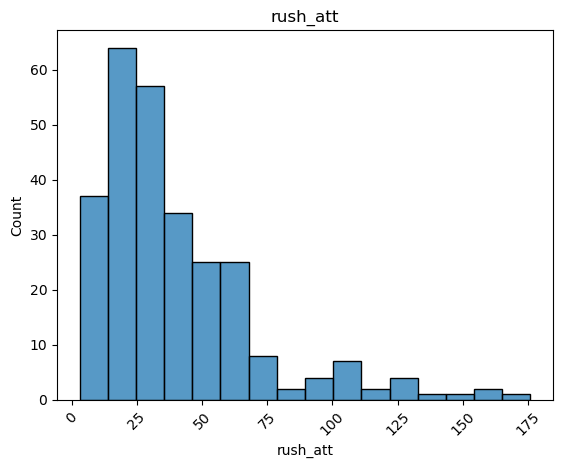

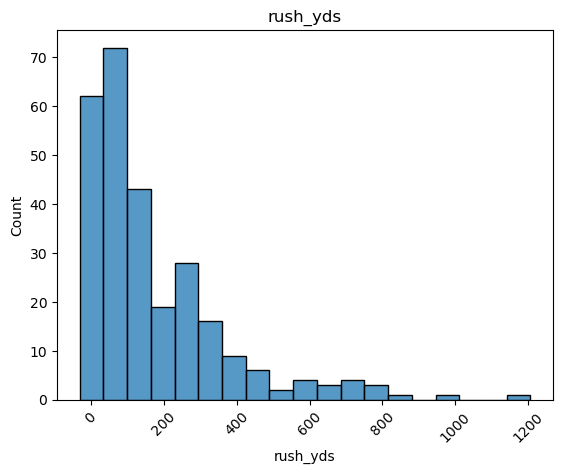

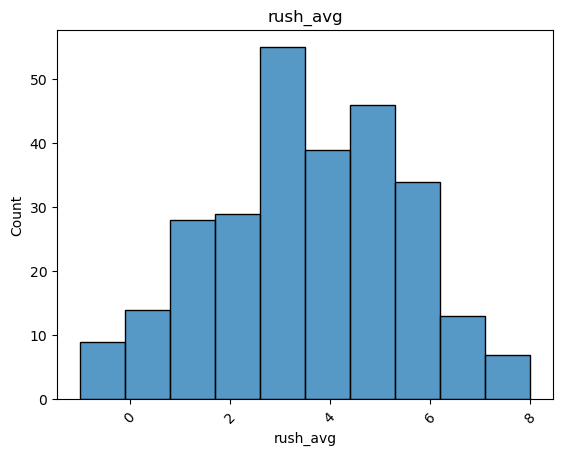

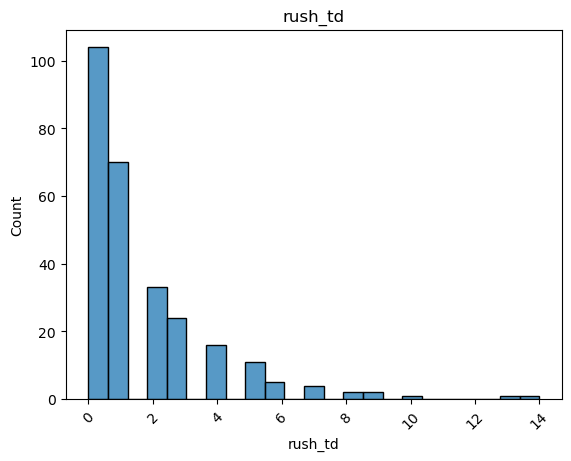

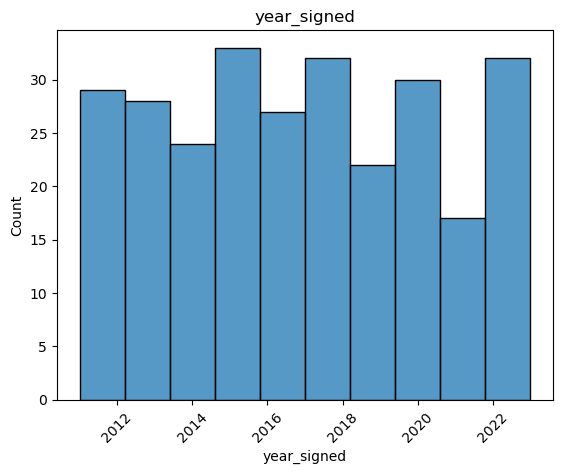

In [6]:
wrangle.univariate_visual(train[columns_list])

# Univariate Exploration Summary
> - Most of the data in the dataset were normally distributed

# Bivariate Analysis

$H_0$: There is no correlation between our selected features and our target variable.

$H_\alpha$: There is a correlation between our selected features and our target variable.

$\alpha$: 0.05

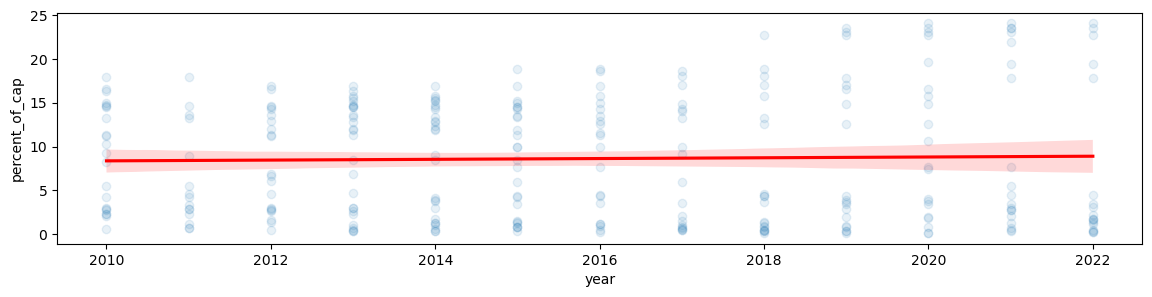

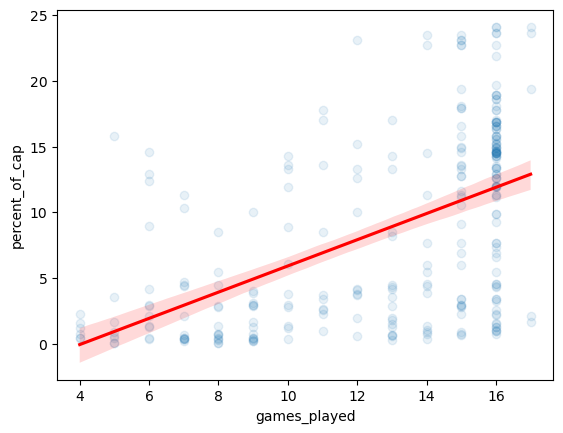

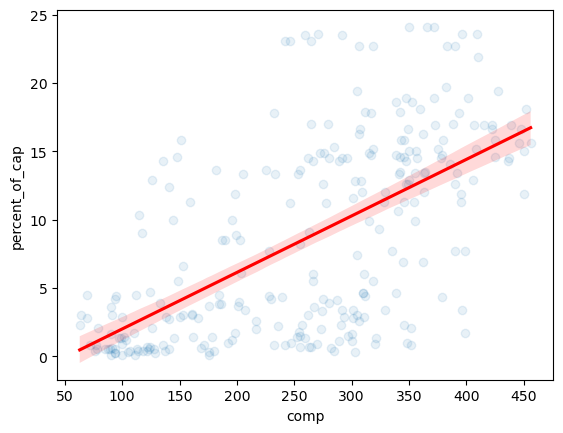

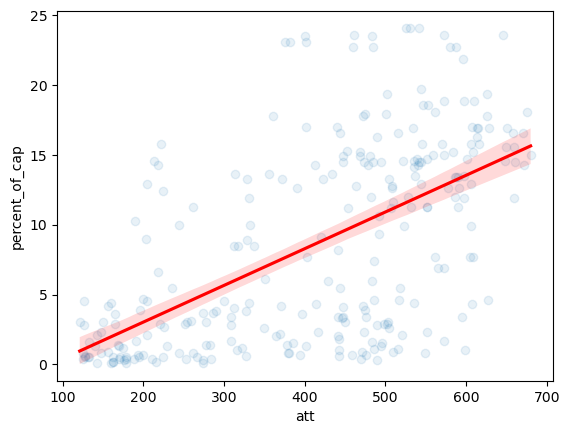

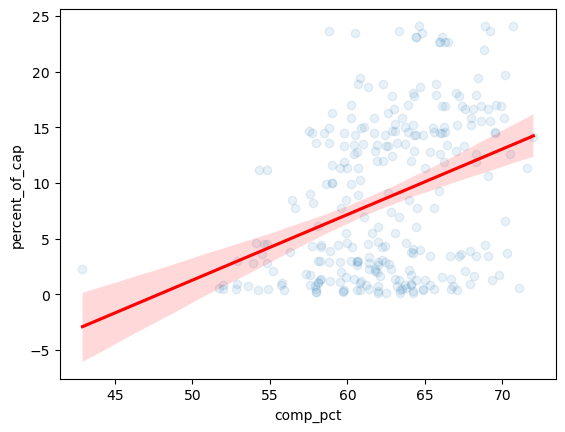

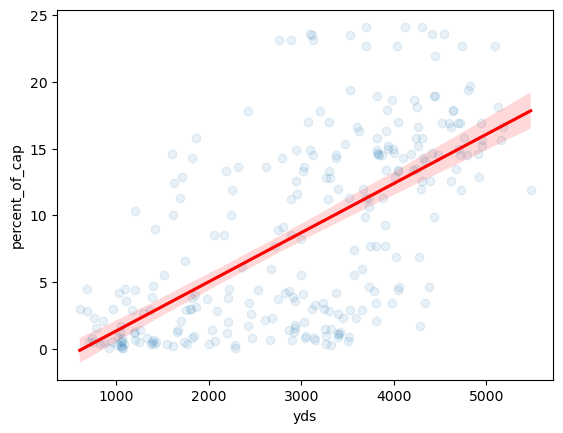

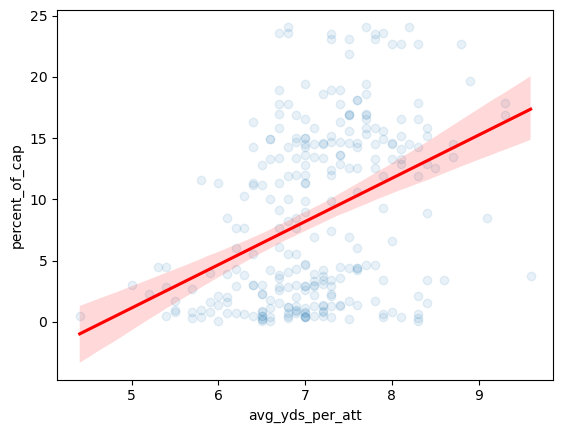

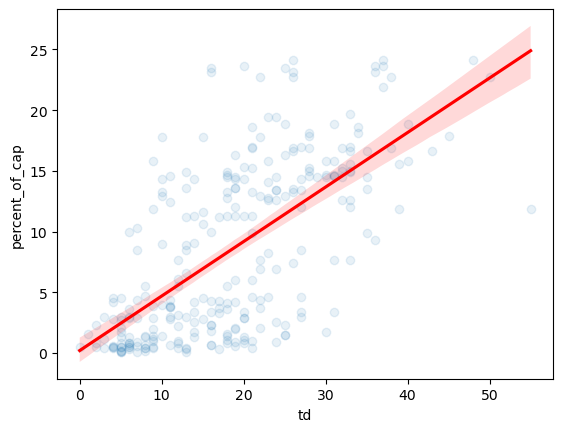

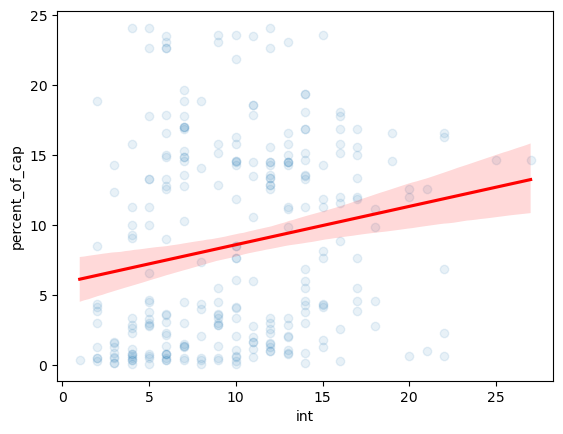

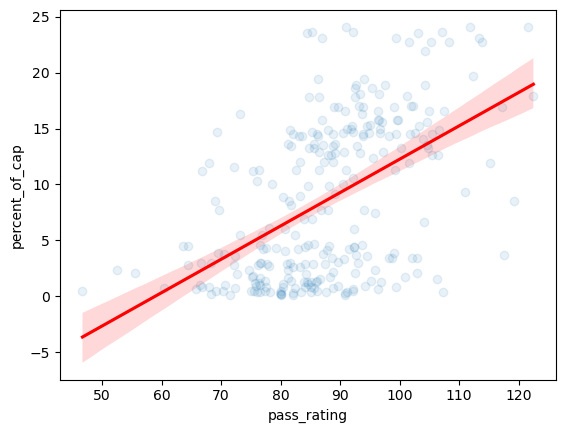

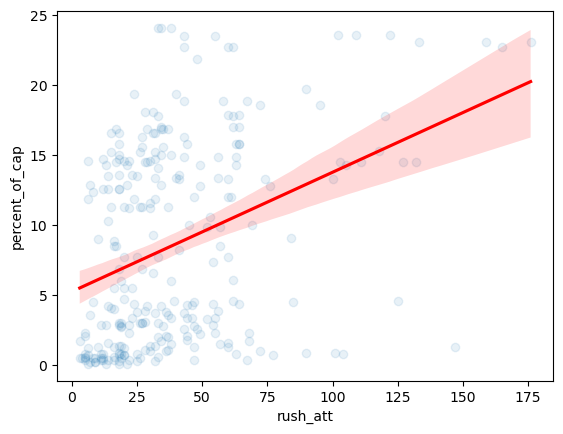

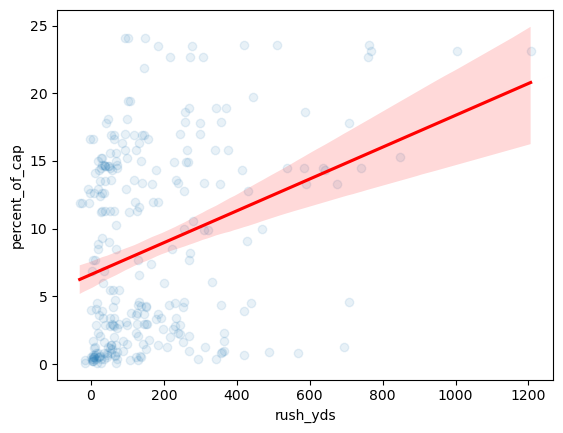

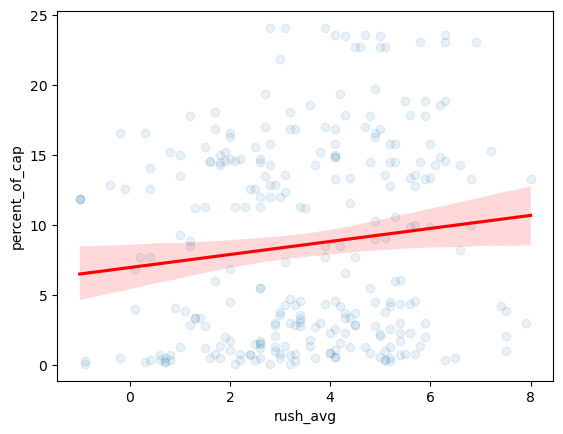

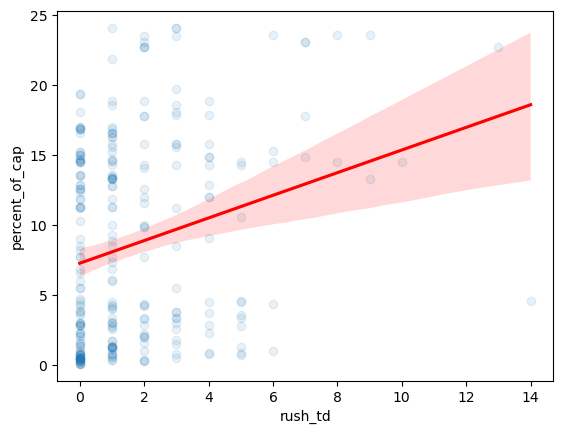

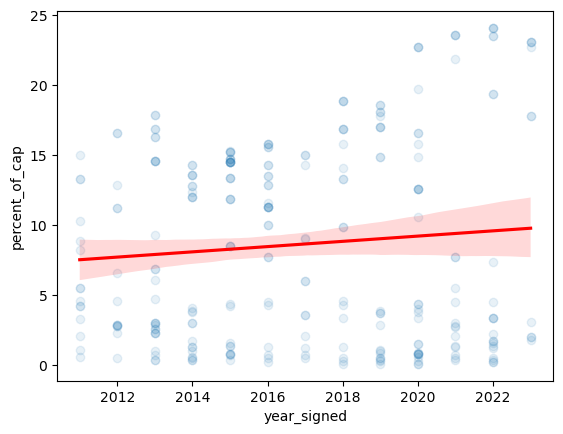

In [7]:
wrangle.correlation_charts(train,columns_list , target)

# Bivariate Exploration Summary


In [8]:
wrangle.get_explore_data(columns_list, corr_test)

,Features,Correlation,Moving Forward
0,year,Positive,No
1,games_played,Positive,No
2,comp,Positive,Yes
3,att,Positive,Yes
4,comp_pct,Positive,Yes
5,yds,Positive,Yes
6,avg_yds_per_att,Positive,Yes
7,td,Positive,Yes
8,int,Positive,Yes
9,pass_rating,Positive,Yes


# Correlation Tests

> - We will use a confidence interval of 95%
> - the resulting alpha is .05

$H_0$: There is no statistical significance between our selected features and our target variable.

$H_\alpha$: There is a statistical significance between our selected features and our target variable.

$\alpha$: 0.05

In [9]:
corr_test

,feature,r,p,target
0,year,0.022470,7.111631e-01,percent_of_cap
1,year_signed,0.091118,1.324494e-01,percent_of_cap
2,rush_avg,0.125059,3.856794e-02,percent_of_cap
3,int,0.192843,1.338059e-03,percent_of_cap
4,rush_td,0.249966,2.846681e-05,percent_of_cap
5,rush_yds,0.318609,7.008358e-08,percent_of_cap
6,comp_pct,0.365580,4.344439e-10,percent_of_cap
7,rush_att,0.365736,4.265655e-10,percent_of_cap
8,avg_yds_per_att,0.394771,1.183529e-11,percent_of_cap
9,pass_rating,0.515319,5.476469e-20,percent_of_cap


In [10]:
corr_test[corr_test.p < .05].reset_index().drop(columns ='index')

,feature,r,p,target
0,rush_avg,0.125059,3.856794e-02,percent_of_cap
1,int,0.192843,1.338059e-03,percent_of_cap
2,rush_td,0.249966,2.846681e-05,percent_of_cap
3,rush_yds,0.318609,7.008358e-08,percent_of_cap
4,comp_pct,0.365580,4.344439e-10,percent_of_cap
5,rush_att,0.365736,4.265655e-10,percent_of_cap
6,avg_yds_per_att,0.394771,1.183529e-11,percent_of_cap
7,pass_rating,0.515319,5.476469e-20,percent_of_cap
8,games_played,0.529220,3.530487e-21,percent_of_cap
9,att,0.585140,1.438324e-26,percent_of_cap


# Correlation Tests summary
p value was greater than alpha for:
> - year
> - superbowl
> - avg_comp_air_yds
> - won_superbowl
> - air_yds_to_sticks
> - time_to_throw
> - avg_air_yard_diff
> - avg_att_air_yards
> - conf_champ

# Modeling

- We will use RMSE as our evaluation metric

** by using baseline as an evaluation metric we can be accurate to within 6.9 <br>
** 6.9 will be the baseline RMSE we will use for this project <br>
<br>
** I will be evaluating models developed using four different model types and various hyperparameter configurations * Models will be evaluated on train and validate data * The model that performs the best will then be evaluated on test data

## Features we are moving forward with
> - total_yds
> - pass_att
> - td
> - pass_rating
> - completion_pct
> - exp_completion_pct
> - completion_pct_abv_exp
> - lon_comp_air_dist
> - int
> - div_round
> - aggressive
> - first_round

In [11]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.get_X_train_val_test(train,validate, test, columns_list,target)

### Scaling on selected features to be sent into model

In [12]:
X_train, X_validate, X_test = wrangle.scale_data(X_train, X_validate,X_test,cols = columns_list)

### Running the data through the models

In [13]:
df1, df2, df3 = wrangle.get_model_numbers(X_train, X_validate, X_test, y_train, y_validate, y_test)

## Train Data

In [14]:
df1

,model_train,rmse,r2
0,baseline,7.105521,0.000000
1,ordinary least squared(OLS),4.860365,0.532108
2,lasso lars(lars),6.728726,0.103245
3,Polynomial Regression(poly2),5.467905,0.407825
4,Generalized Linear Model (GLM),5.189802,0.466530


## Validate Data

In [15]:
df2

,model_validate,rmse,r2
0,baseline,7.105521,0.000000
1,ordinary least squared(OLS),5.484955,0.448555
2,lasso lars(lars),7.064806,0.085136
3,Polynomial Regression(poly2),10.378546,-0.974372
4,Generalized Linear Model (GLM),5.967122,0.347342


## Test Data

In [16]:
df3.iloc[1].reset_index()

,index,1
0,model_validate,ordinary least squared(OLS)
1,rmse,4.501253
2,r2,0.501748


In [17]:
master_df,best_parameters = wrangle.run_fold(df, columns_list, target)

In [18]:
master_df

,alpha,fit_intercept,verbose,score,model,n_jobs,link
2,1.0,False,True,5.311535,lars,NaN,NaN
3,1.0,False,False,5.311535,lars,NaN,NaN
0,1.0,True,True,5.315128,lars,NaN,NaN
1,1.0,True,False,5.315128,lars,NaN,NaN
6,2.0,False,True,5.359394,lars,NaN,NaN
7,2.0,False,False,5.359394,lars,NaN,NaN
4,2.0,True,True,5.360253,lars,NaN,NaN
5,2.0,True,False,5.360253,lars,NaN,NaN
9,3.0,True,False,5.393230,lars,NaN,NaN
8,3.0,True,True,5.393230,lars,NaN,NaN


In [19]:
best_parameters

,model_validate,rmse,r2
0,baseline,7.222414,0.000000
1,lasso lars(lars),4.442403,0.519546


# Modeling Summary
> - Our ordinary least squared(OLS) performed best with an RMSE score of 6.911341e+00 in validate
> - Our unseen test data beat baseline by 1.5 RMSE

# Conclusion

> - Most of the data in the dataset were normally distributed


### Features that were statistically significant
> - total_yds
> - pass_att
> - td
> - pass_rating
> - completion_pct
> - exp_completion_pct
> - completion_pct_abv_exp
> - lon_comp_air_dist
> - int
> - div_round
> - aggressive
> - first_round
### Best model
> - ordinary least squared(OLS) performed best with an RMSE score of 6.911341e+00 in validate

# Recommendations
> - Because our model was able to beat baseline we recommend using our model



# Next Steps
> - Run through the entire pipeline with more data scraped from different websites
> - Run throught the entire pipeline with different positons other than just quarterback